In [1]:
"""
Jack Farrell, Dept. of Physics, University of Toronto, 2020

Plot the results of filling in parameter space at "low resolution"
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py
import sys
import gc
import time

# Matplotlib Parameters
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman', size=12)

In [2]:
def coherent_exist(data):
    cut2 = 7 * len(data) //8
    if np.max(data[cut2:]) - 1 > 0.1:
        return True
    else:
        return False
    
def frequency(array, timeStep):
    """
    Calculate Frequency of Oscillator

    Estimates frequency from crossings of n = 1 (because oscillator is
    centered on n = 1)

    Parameters
    ----------
    array - 1D thing oscillating around the value "1.0"
    timeStep - 1 / (sampling rate), or the time step of the thing

    Returns
    ----------
    freq - the calculated frequency
    """
    new = array[3*len(array) // 4 :]
    indices = []
    for i in range(len(new) - 1):
        if len(indices) == 0:
            if new[i+1] > 1.01 and new[i] < 1.01:
                indices.append(i)
        else :
            if new[i+1] > 1.01 and new[i] < 1.01 and abs(i - indices[-1]) > 200:
                indices.append(i)
    if len(indices) >= 2:
        freq = 1. / (timeStep * (indices[1] - indices[0]))
    else:
        freq = np.nan
    return freq

In [3]:
freqs1 = []
for file in os.listdir("../../Data/small_parameter_space/v0_eta_small_ratio1"):
    f1 = h5py.File("../../Data/small_parameter_space/v0_eta_small_ratio1/" + file , "r")
    data = np.array(f1["n/data"][:,-1])
    f1.close()
    if coherent_exist(data):
        freqs1.append(frequency(data, 0.001))
    else:
        freqs1.append(np.nan)
freqs1 = np.array(freqs1)
freqs1.shape = (4, 4)
freqs1 = freqs1.T
print(freqs1)

[[0.24943876 0.21824531 0.20716801 0.19916351]
 [       nan 0.2480774  0.22711787 0.21422451]
 [       nan        nan        nan 0.23386342]
 [       nan        nan        nan        nan]]


In [4]:
freqs2 = []
for file in os.listdir("../../Data/small_parameter_space/v0_eta_small_ratio2"):
    f2 = h5py.File("../../Data/small_parameter_space/v0_eta_small_ratio2/" + file , "r")
    data = np.array(f2["n/data"][:,-1])
    f2.close()
    if coherent_exist(data):
        freqs2.append(frequency(data, 0.001))
    else:
        freqs2.append(np.nan)
freqs2 = np.array(freqs2)
freqs2.shape = (4, 4)
freqs2 = freqs2.T
print(freqs2)

[[0.20214271 0.19076688 0.19164431 0.18587361]
 [       nan 0.21973193 0.20911752 0.20104544]
 [       nan        nan        nan 0.21431633]
 [       nan        nan        nan        nan]]


In [5]:
freqs3 = []
for file in os.listdir("../../Data/small_parameter_space/v0_eta_small_ratio3"):
    f3 = h5py.File("../../Data/small_parameter_space/v0_eta_small_ratio3/" + file , "r")
    data = np.array(f3["n/data"][:,-1])
    f3.close()
    if coherent_exist(data):
        freqs3.append(frequency(data, 0.001))
    else:
        freqs3.append(np.nan)
freqs3 = np.array(freqs3)
freqs3.shape = (4, 4)
freqs3 = freqs3.T
print(freqs3)

[[0.18288222 0.18932223 0.19124116 0.17376195]
 [       nan 0.20850709 0.19984013 0.18811136]
 [       nan        nan        nan        nan]
 [       nan        nan        nan        nan]]


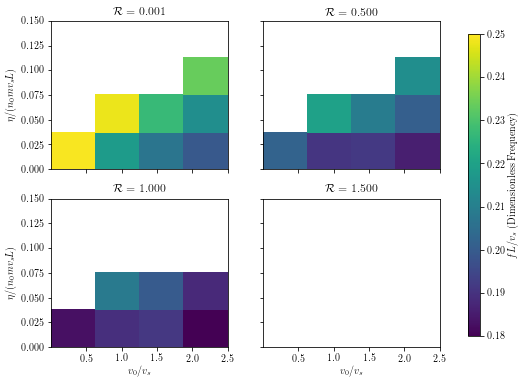

In [6]:
v0s = np.linspace(0.001, 2.5, 5)
etas = np.linspace(0, 0.15, 5)
ratios = [0.001, 0.5, 1, 1.5]

fig1, axes1 = plt.subplots(2,2, figsize = (8,6), sharex = True, sharey = True)
ax1, ax2 = axes1[0]
ax3, ax4 = axes1[1]
plt1 = ax1.pcolormesh(v0s, etas, freqs1, vmin = 0.18, vmax = 0.25)
plt2 = ax2.pcolormesh(v0s, etas, freqs2, vmin = 0.18, vmax = 0.25)
plt3 = ax3.pcolormesh(v0s, etas, freqs3, vmin = 0.18, vmax = 0.25)
#plt3 = ax3.pcolormesh(v0s, etas, freqs3)
#plt4 = ax4.pcolormesh(v0s, etas, freqs4)

fig1.subplots_adjust(right=0.8)
cbar_ax = fig1.add_axes([0.85, 0.15, 0.02, 0.7])
fig1.colorbar(plt1, cax=cbar_ax, label = "$fL/v_s$" + " (Dimensionless Frequency)")

N = 0
for row in axes1:
    for axis in row:
        axis.set_title("$\mathcal{R} =$" + " {:.3f}".format(ratios[N]))
        N += 1
for axis in axes1[1]:
    axis.set_xlabel("$v_0/v_s$")
for axis in [axes1[0][0], axes1[1][0]]:
    axis.set_ylabel("$\eta/(n_0 m v_s L)$")
plt.savefig("../../Figures/testfig.pdf")
plt.show()



../../Data/small_parameter_space/v0_eta_small_ratio1/v00.117-eta0.051.h5


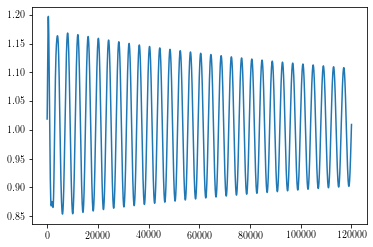

In [22]:
keys = []
for file in os.listdir("../../Data/small_parameter_space/v0_eta_small_ratio1"):
    keys.append("../../Data/small_parameter_space/v0_eta_small_ratio1/" + file)
keys = np.array(keys)
keys.shape = (4,4)
key = keys[1,1]
print(key)
f = h5py.File(key, "r")
data = np.array(f["n/data"][:,-1])
plt.plot(data)
plt.show()